# Phenotype PCA

Here we will run a Principal Component Analysis on a list of phenotypes from the NHANES dataset. Make sure to have the dataset available

In [1]:
#### LOAD LIBRARIES
library(clarite)
library(ggbiplot) #For pca plot
library(corrplot) #For correlation plot
library(RColorBrewer) #For colors

Loading required package: ggplot2

Loading required package: plyr

Loading required package: scales

Loading required package: grid

corrplot 0.84 loaded



In [2]:
#### LOAD DATASETS
load("../Data/nh_99-06.Rdata")
ls()

[1] "DemoVariables"  "MainTable"      "VarDescription"

In [3]:
#### ADD ID TO FIRST COLUMN
colnames(MainTable)[1] <- "ID"

In [4]:
#### MAKE LIST OF PHENOTYPES
phenotype <- c("LBXSCRINV", "URXUCR", "LBXSCR", "LBXSATSI", 
               "LBXSAL", "URXUMASI", "URXUMA", 
               "LBXSAPSI", "LBXSASSI", "LBXSC3SI", "LBXSBU", 
               "LBXBAP", "LBXCPSI", "LBXCRP",
               "LBXSCLSI", "LBXSCH", "LBDHDL", "LBDLDL", 
               "LBXFER", "LBXSGTSI", "LBXSGB", "LBXGLU",
               "LBXGH",	"LBXHCY", "LBXSIR", "LBXSLDSI", 
               "LBXMMA", "LBXSOSSI", "LBXSPH", "LBXSKSI",
               "LBXEPP", "LBXSNASI", "LBXTIB", "LBXSTB", 
               "LBXSCA", "LBXSTP", "LBDPCT", "LBXSTR",
               "LBXSUA", "LBDBANO", "LBXBAPCT", "LBDEONO", 
               "LBXEOPCT", "LBXHCT", "LBXHGB", "LBDLYMNO",
               "LBXMCHSI", "LBXLYPCT", "LBXMCVSI", "LBXMPSI", 
               "LBDMONO", "LBXMOPCT", "LBXPLTSI", "LBXRBCSI",
               "LBXRDW", "LBDNENO", "LBXNEPCT", "LBXIRN")

Let's look at the description of the phenotype variables

In [5]:
bol <- which(unique(VarDescription$var) %in% phenotype)
VarDescription[bol,c(2:6)]

,tab_desc,series,module,var,var_desc
,<chr>,<chr>,<chr>,<chr>,<chr>
73,Homocysteine and MMA,2003-2004,laboratory,LBXHCY,Homocysteine (umol/L)
74,Homocysteine and MMA,2003-2004,laboratory,LBXMMA,Methylmalonic acid (umol/L)
82,Ferritin and Transferrin Receptor,2003-2004,laboratory,LBXFER,Ferritin(ng/mL)
99,Glycohemoglobin,2003-2004,laboratory,LBXGH,Glycohemoglobin (%)
100,Plasma Glucose,2003-2004,laboratory,LBXGLU,"Glucose, plasma (mg/dL)"
102,Plasma Glucose,2003-2004,laboratory,LBXCPSI,C-peptide: SI(nmol/L)
105,C-Reactive Protein,2003-2004,laboratory,LBXCRP,C-reactive protein(mg/dL)
106,C-Reactive Protein,2003-2004,laboratory,LBXBAP,Bone alkaline phosphotase (ug/L)
117,Triglycerides,2003-2004,laboratory,LBDLDL,LDL-cholesterol (mg/dL)


In [6]:
#### RETAIN ONLY PHENOTYPE VARIABLES AND REMOVE OBSERVATIONS WITH NA
phenos_dat <- colfilter(MainTable, phenotype)
phenos_dat <- remove_incomplete_obs(phenos_dat, phenotype)

[1] "Running..."
[1] "Finished in 0.001063 secs"
[1] "Running..."
[1] "35099 of 41474 rows removed due to NA values in the specified columns"
[1] "Finished in 0.023232 secs"


In [7]:
sprintf("There are only %i samples to construct the PCA", dim(phenos_dat)[1])

[1] "There are only 6375 samples to construct the PCA"

In [9]:
#### FUNCTION FOR PLOTS TO SCALE BETTER
fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 } # add fig(10,10), for example, to the cell you will show the plot

In [15]:
Y <- scale(phenos_dat[,-1], center = TRUE, scale = TRUE)

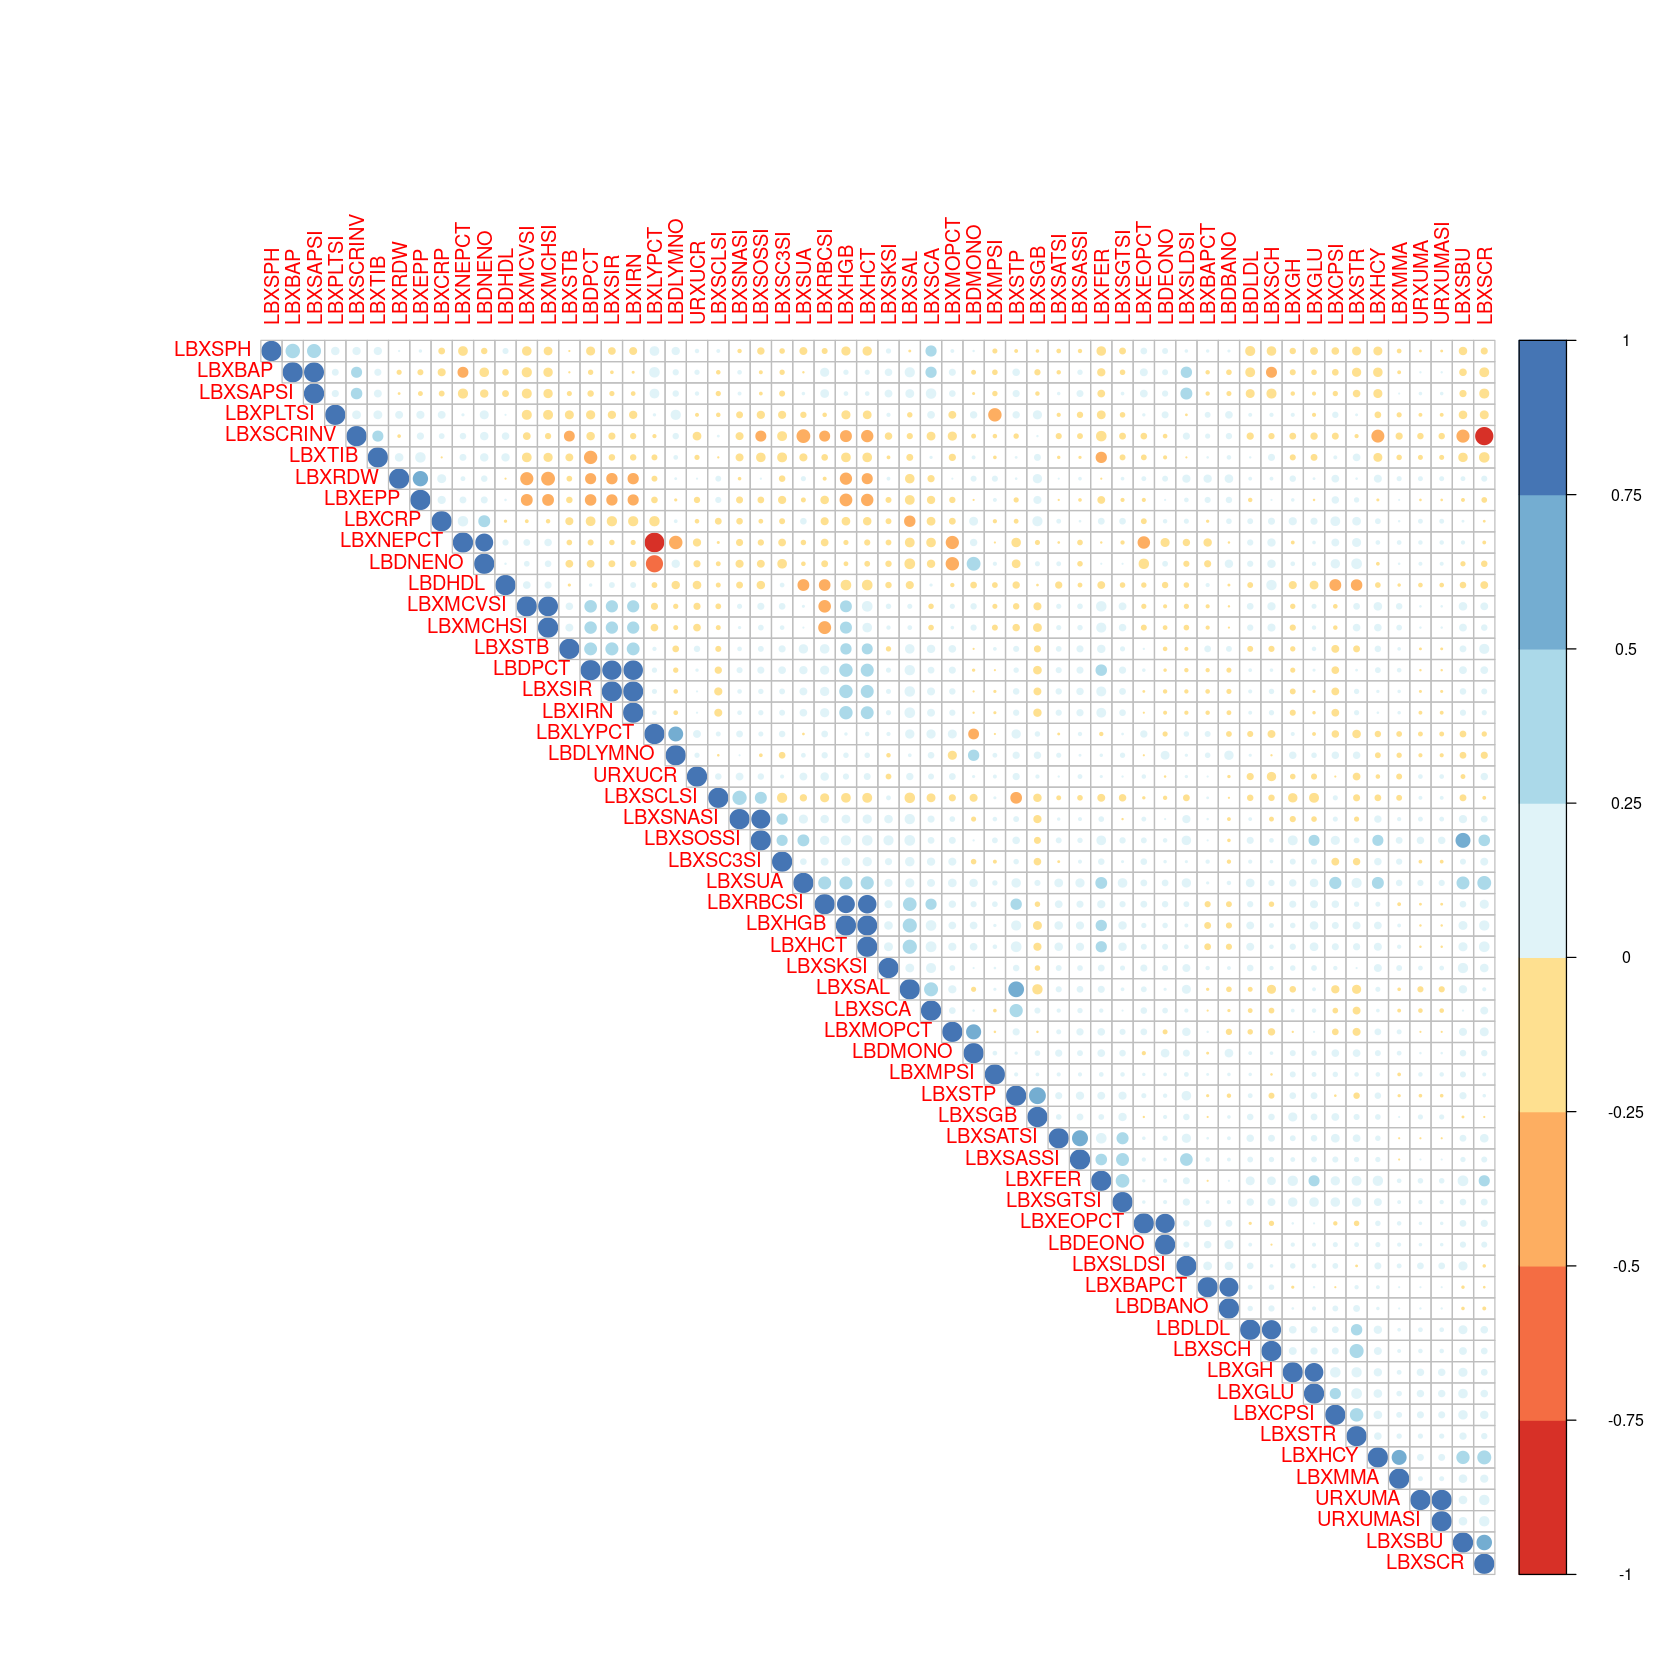

In [18]:
#### CORRELATION PLOT
fig(14,14)
M <- cor(Y)
corrplot(M, type="upper", order="hclust",
         col=brewer.pal(n=8, name="RdYlBu"))

In [89]:
#### RUN THE PCA, CENTERING AND SCALING VALUES
pheno_pca <- prcomp(phenos_dat[,c(2:59)], center = TRUE, scale. = TRUE)
summary(pheno_pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.5578 2.15835 2.01131 1.71386 1.57336 1.47983 1.45183
Proportion of Variance 0.1128 0.08032 0.06975 0.05064 0.04268 0.03776 0.03634
Cumulative Proportion  0.1128 0.19312 0.26287 0.31351 0.35619 0.39395 0.43029
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.42962 1.39738 1.35956 1.35634 1.29126 1.27029 1.22597
Proportion of Variance 0.03524 0.03367 0.03187 0.03172 0.02875 0.02782 0.02591
Cumulative Proportion  0.46553 0.49919 0.53106 0.56278 0.59153 0.61935 0.64526
                          PC15    PC16    PC17    PC18   PC19    PC20    PC21
Standard deviation     1.22055 1.16621 1.13392 1.09250 1.0552 1.02979 0.98442
Proportion of Variance 0.02569 0.02345 0.02217 0.02058 0.0192 0.01828 0.01671
Cumulative Proportion  0.67095 0.69440 0.71657 0.73714 0.7563 0.77462 0.79133
                         PC22    P

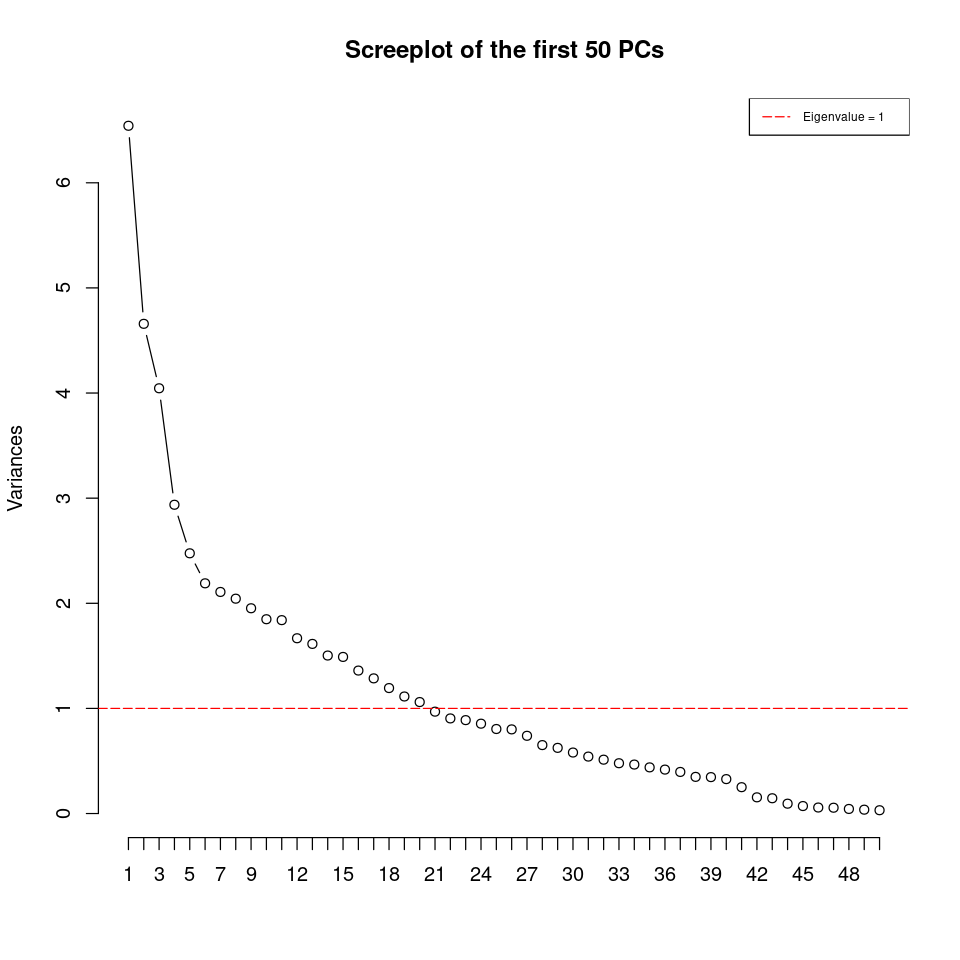

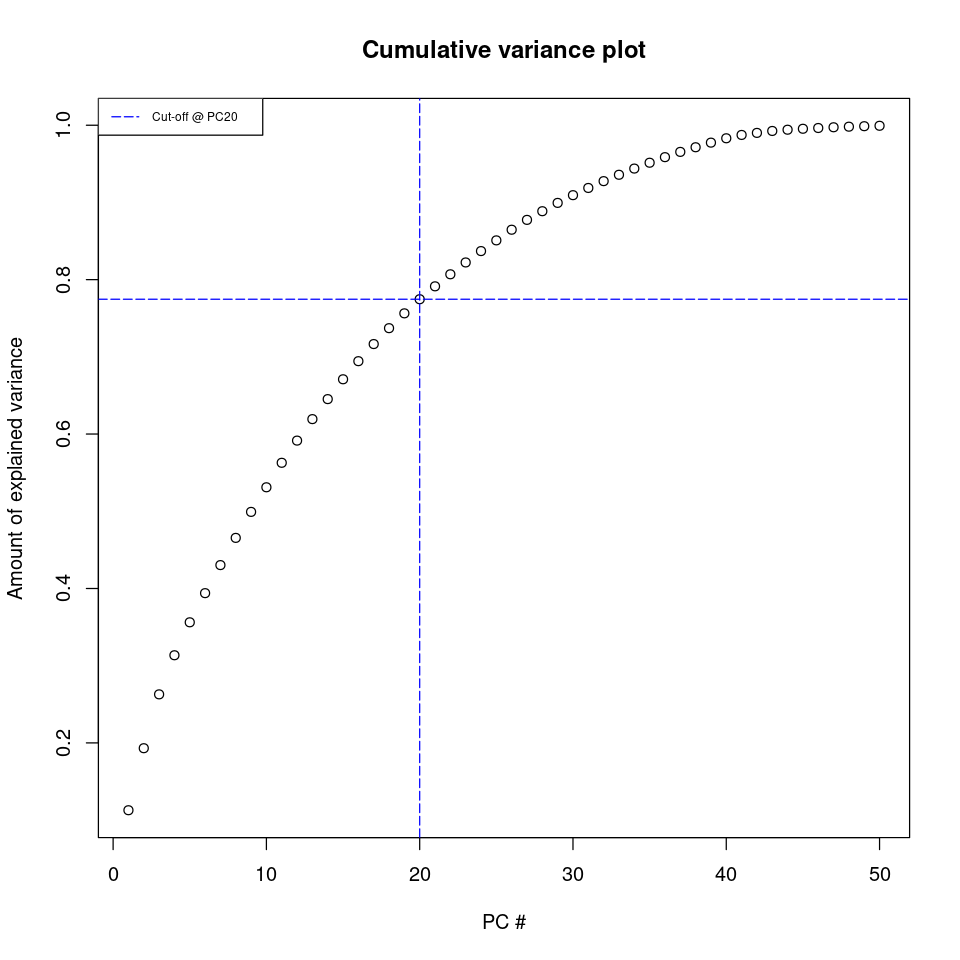

In [273]:
fig(8,8)
screeplot(pheno_pca, type = "l", npcs = 50, main = "Screeplot of the first 50 PCs")
abline(h = 1, col="red", lty=5)
legend("topright", legend=c("Eigenvalue = 1"),
       col=c("red"), lty=5, cex=0.6)
cumpro <- cumsum(pheno_pca$sdev^2 / sum(pheno_pca$sdev^2))
plot(cumpro[0:50], xlab = "PC #", ylab = "Amount of explained variance", main = "Cumulative variance plot")
abline(v = 20, col="blue", lty=5)
abline(h = 0.77462, col="blue", lty=5)
legend("topleft", legend=c("Cut-off @ PC20"),
       col=c("blue"), lty=5, cex=0.6)

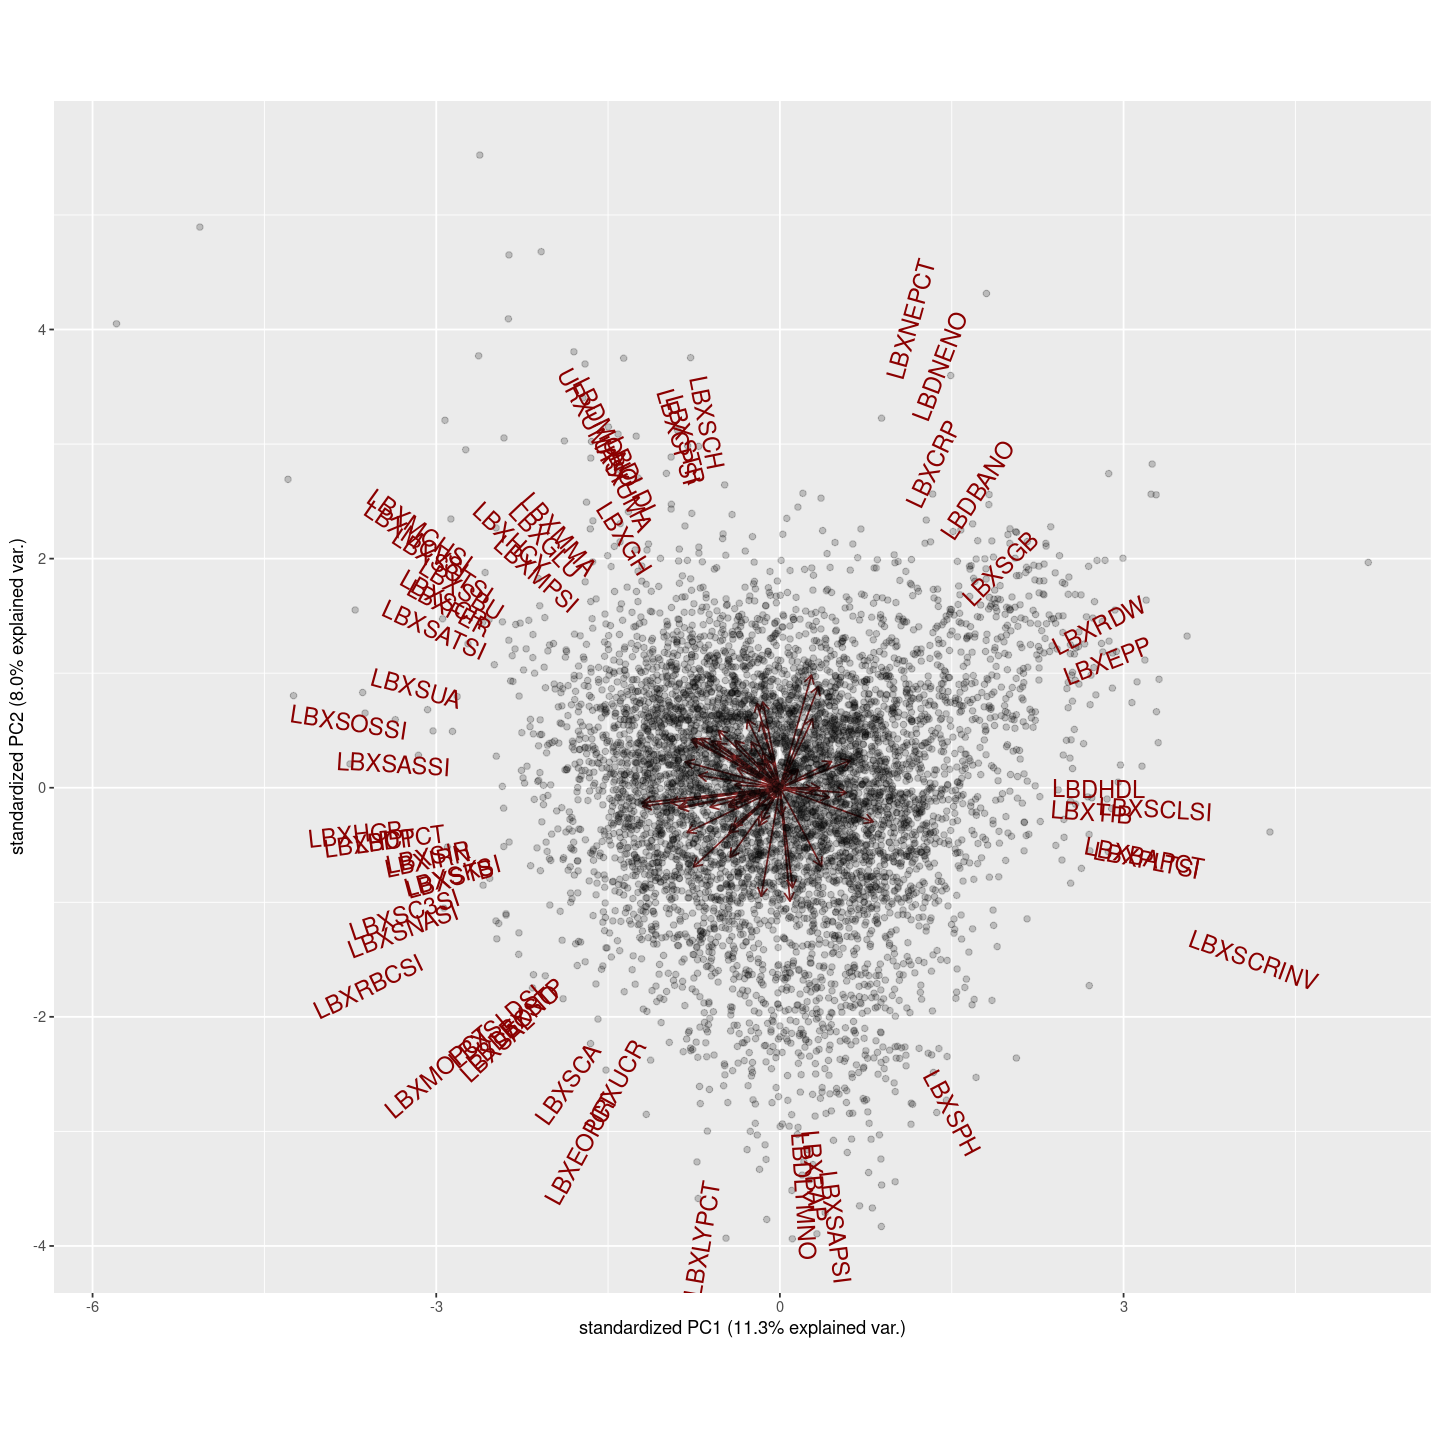

In [276]:
fig(12,12)
ggbiplot(pheno_pca, alpha=0.2, varname.size = 5, varname.adjust = 6)

In [28]:
#### LET'S LOOK AT SOME VARIABLES THAT HAVE SIMILAR DIRECTIONS IN THE PCA SPACE
bol <- VarDescription$var %in% c("LBXSAPSI", "LBXBAP", "LBDLYMNO")
VarDescription[bol,c(2:6)]

,tab_desc,series,module,var,var_desc
,<chr>,<chr>,<chr>,<chr>,<chr>
106,C-Reactive Protein,2003-2004,laboratory,LBXBAP,Bone alkaline phosphotase (ug/L)
165,Complete Blood Count,2003-2004,laboratory,LBDLYMNO,Lymphocyte number
400,Biochemistry Profile,2003-2004,laboratory,LBXSAPSI,Alkaline phosphotase (U/L)
510,Standard Biochemistry Profile,2005-2006,laboratory,LBXSAPSI,Alkaline phosphotase (U/L)
548,Complete Blood Count,2005-2006,laboratory,LBDLYMNO,Lymphocyte number (1000 cells/uL)
738,C-Reactive Protein,2001-2002,laboratory,LBXBAP,Bone alkaline phosphotase (ug/L)
771,Complete Blood Count,2001-2002,laboratory,LBDLYMNO,Lymphocyte number
975,"Biochemistry Profile, Follicle Stimulating Hormone and Luteinizing Hormone",2001-2002,laboratory,LBXSAPSI,Alkaline phosphatase (U/L)
1097,Complete Blood Count,1999-2000,laboratory,LBDLYMNO,Lymphocyte number


In [158]:
#### GET SOME EXTRA VARIABLES FROM THE SAMPLES RETAINED FOR THE PCA
complete_vars <- rowfilter(MainTable, phenos_dat$ID)

[1] "Running..."
[1] "Finished in 0.190134 secs"


Sex and age seem to be really relevant to explain the first two dimensions of the PCA

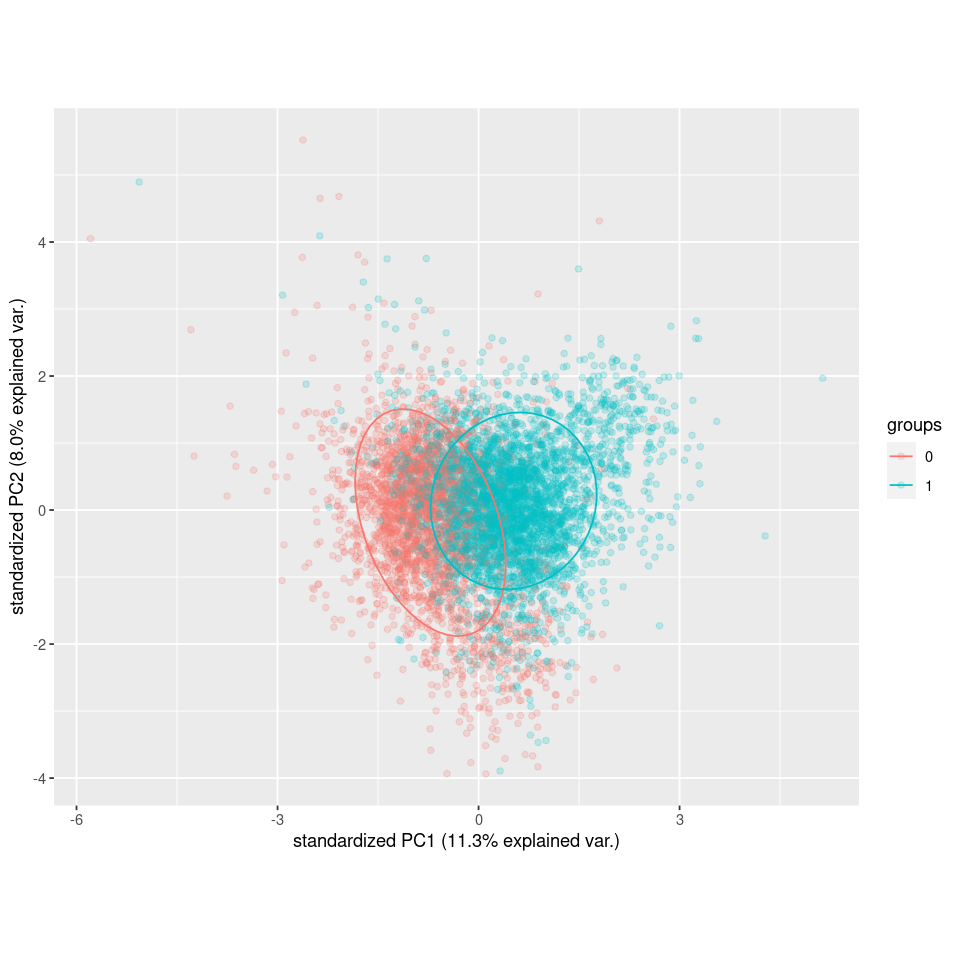

In [283]:
fig(8,8)
ggbiplot(pheno_pca, ellipse=TRUE, groups=as.factor(complete_vars$female), alpha=0.2, var.axes = F)

In [161]:
#### CREATE AGE GROUP VARIABLE
complete_vars$age_groups <- ""
complete_vars$age_groups[ complete_vars$age_0_18 == 1 ]  <- "0-18"
complete_vars$age_groups[ complete_vars$age_18_44 == 1 ] <- "18-44"
complete_vars$age_groups[ complete_vars$age_44_65 == 1 ] <- "44-65"
complete_vars$age_groups[ complete_vars$age_65_plus == 1 ] <- "65+"

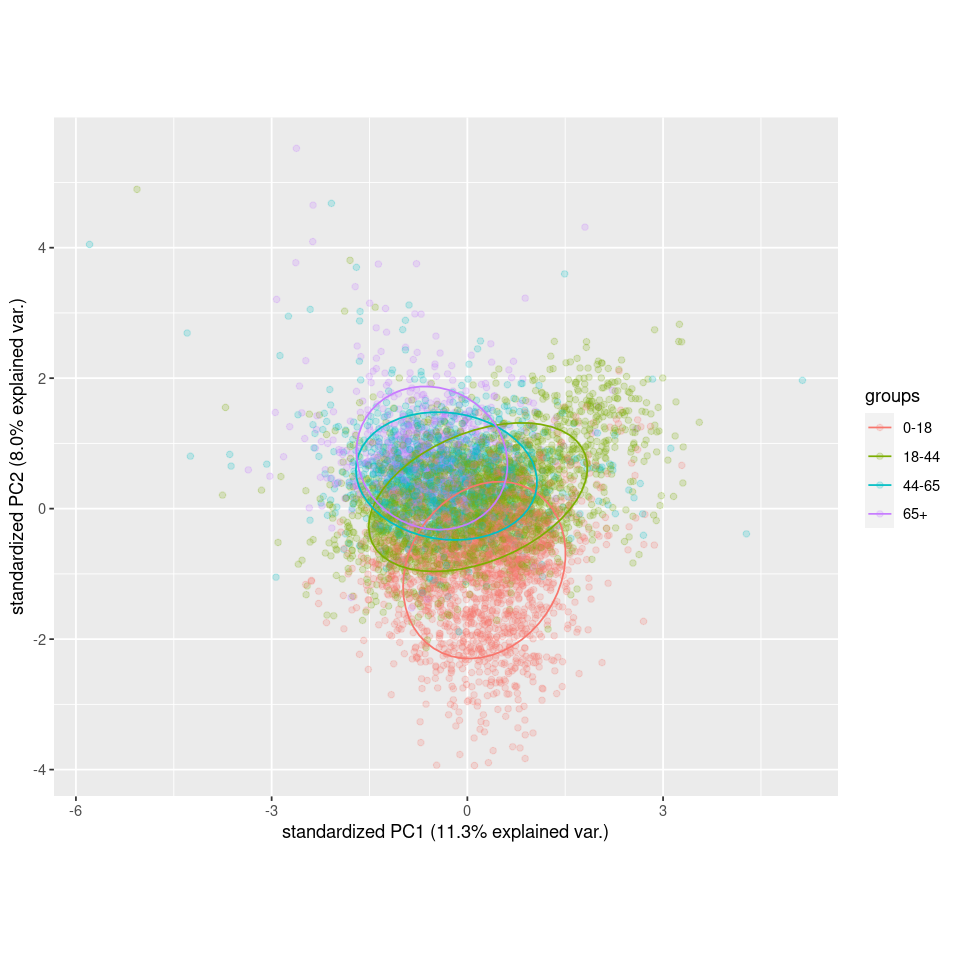

In [284]:
ggbiplot(pheno_pca, ellipse=TRUE, groups=as.factor(complete_vars$age_groups), alpha=0.2, var.axes = F)

# How to deal with missing data

Because the sample size for the construction of the PCA seems solid, the problem is how to project samples with missing data into the already constructed PCA space. One solution might be to impute each NA value, based on the prediction of the value from a regression from the set of covariates (sex, age, ethnicity, etc). 

Let's look at a simple example. We will take one row from the matrix with complete cases for the phenotype, and we will start to remove random variables and replace them with imputed ones.

In [208]:
example_row <- phenos_dat[1,]
example_row
sprintf("There are %i missing values from row 1", sum(is.na(example_row)))

,ID,LBXHCY,LBXMMA,LBXFER,LBXGH,LBXGLU,LBXCPSI,LBXCRP,LBXBAP,LBDLDL,⋯,LBXSKSI,LBXSCLSI,LBXSOSSI,LBXSGB,LBXIRN,LBXTIB,LBDPCT,URXUCR,LBDHDL,LBXSCR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,9.78,0.14,55,4.7,83.7,0.484,0.36,13.5,136,⋯,4.06,104.5,288,2.7,65,400,16.3,145,54,0.7


[1] "There are 0 missing values from row 1"

We will generate a regression using the set of rows used to construct the PCA for each phenotype variable

In [240]:
#### DEFINE THE LIST OF COVARIATES AND ITERATE THROUGH THE PHENOTYPES TO RUN A REGRESSION
predicted_row = example_row
covariates <- c("female", "SES_LEVEL", "SDDSRVYR", "RIDAGEYR", "other_eth", "other_hispanic", "black", "mexican", "BMXBMI")

for(m in 1:length(phenotype)){ #iterate through the phenotypes
    formula <- paste(phenotype[m] ," ~ ", paste(covariates, collapse="+"), sep = "")
    fit     <- lm(as.formula(formula), data = complete_vars)
    predic  <- 0
    for(i in 1:(length(covariates)+1)){
        if(i == 1){
            newval <- fit$coefficients[i]
        } else{
            newval <- fit$coefficients[i] * MainTable[3, covariates[i-1]] 
        }
    predic = predic + newval
}
    predicted_row[phenotype[m]] <- predic
}

Let's compare actually observed values with the predicted ones

In [241]:
example_row
predicted_row

,ID,LBXHCY,LBXMMA,LBXFER,LBXGH,LBXGLU,LBXCPSI,LBXCRP,LBXBAP,LBDLDL,⋯,LBXSKSI,LBXSCLSI,LBXSOSSI,LBXSGB,LBXIRN,LBXTIB,LBDPCT,URXUCR,LBDHDL,LBXSCR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,9.78,0.14,55,4.7,83.7,0.484,0.36,13.5,136,⋯,4.06,104.5,288,2.7,65,400,16.3,145,54,0.7


,ID,LBXHCY,LBXMMA,LBXFER,LBXGH,LBXGLU,LBXCPSI,LBXCRP,LBXBAP,LBDLDL,⋯,LBXSKSI,LBXSCLSI,LBXSOSSI,LBXSGB,LBXIRN,LBXTIB,LBDPCT,URXUCR,LBDHDL,LBXSCR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,4.549063,0.1267041,-17.82398,4.755208,81.263,0.4705811,0.1219092,47.50834,96.09872,⋯,4.122784,102.6883,274.6085,2.91252,94.85362,407.9445,23.98333,143.033,55.54621,0.4630164


Let's randomly replace one observed value to one predicted value and see what happens to the PCA. We will use the Euclidean distance between vectors as a measure of error, the greater the distance, the greater the error compared to the actually observed PCA score

In [262]:
distance <- rep(0,58)
nNA      <- rep(0,58)
PCA_comparison <- as.data.frame(cbind(distance,nNA))

In [264]:
set.seed(123)
v1 <- predict(pheno_pca, example_row[2:59])
for(i in 1:58){
    rand    <- sample(2:59, i)
    new_row <- example_row
    new_row[rand] <- predicted_row[rand]
    v2 <- predict(pheno_pca, new_row[2:59])
    d  <- dist(rbind(v1, v2), method = "euclidean")
    PCA_comparison$distance[i] <- d
    PCA_comparison$nNA[i]      <- i
}

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



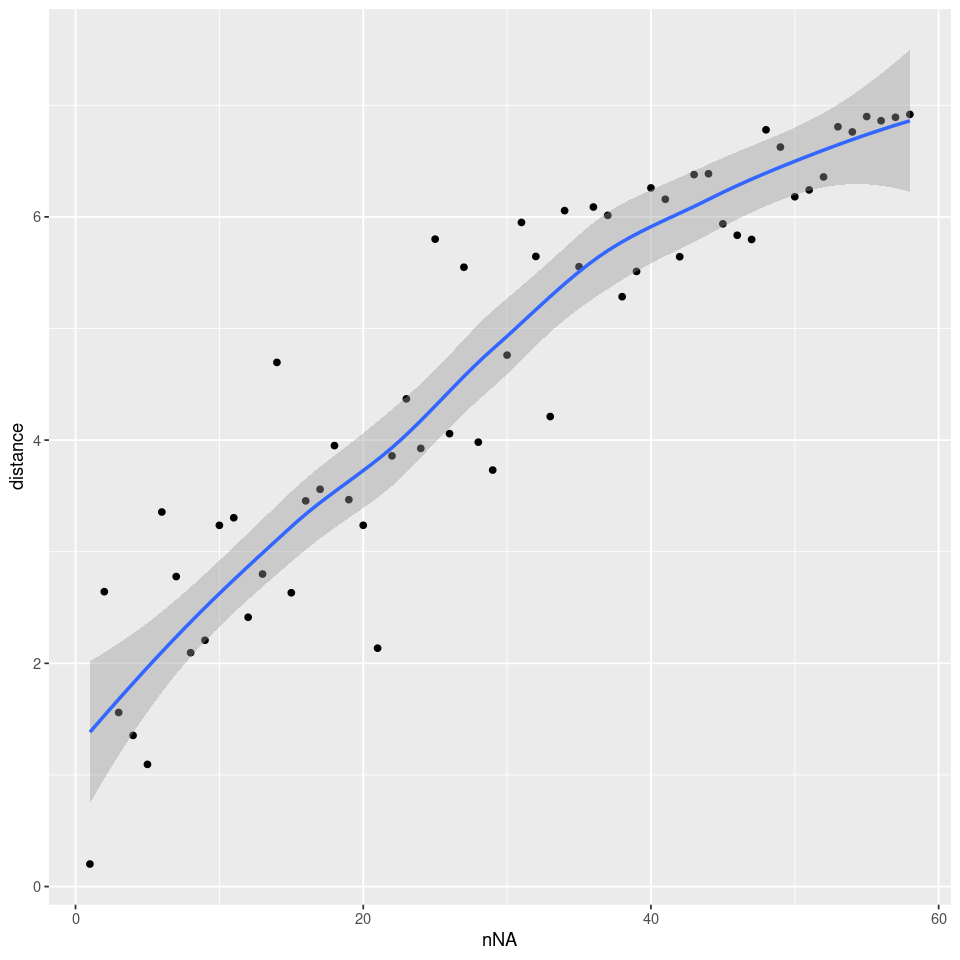

In [272]:
fig(8,8)
ggplot(PCA_comparison, aes(x=nNA, y=distance)) + geom_point() + geom_smooth()